<a href="https://colab.research.google.com/github/Orelep/My_First_Test_Repo/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
# импортирование библиотек

import pandas as pd
import matplotlib.pyplot as plt

In [106]:
# web-scraping таблицы с данными

url = 'https://ru.wikipedia.org/wiki/%D0%90%D1%82%D0%BE%D0%BC%D0%BD%D0%B0%D1%8F_%D1%8D%D0%BD%D0%B5%D1%80%D0%B3%D0%B5%D1%82%D0%B8%D0%BA%D0%B0_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
tabl = pd.read_html(url, decimal=',', thousands="'")[1]
row = tabl.columns
data = tabl.to_numpy()
rows = []
for i in row:
    rows.append(i)
sl = {}
for i in rows:
    sl[i] = []
k = 0
for i in rows:
    for j in range(len(data)):
        if k == 0:
            sl[i].append(data[j][k][0:4])
        elif '\xa0' in str(data[j][k]):
            sl[i].append(data[j][k].replace('\xa0', ''))
        elif pd.isna(data[j][k]):
            sl[i].append(0)
        else:
            sl[i].append(data[j][k])
    k += 1
tabl = pd.DataFrame(sl, index=sl['Год'])

print(tabl)

       Год  Выработка млрд кВт•ч Доля выработки    КИУМ  Реализация млрд кВт•ч
2002  2002               140.000              0     72%                  0.000
2007  2007               158.300          15,9%       0                147.700
2008  2008               162.300              0       0                151.570
2009  2009               163.300            16%       0                152.800
2010  2010               170.100          16,6%       0                159.400
2011  2011               172.700          16,6%       0                161.600
2012  2012               177.300          17,1%       0                165.727
2013  2013               172.400              0       0                  0.000
2014  2014               180.500              0       0                  0.000
2015  2015               195.000          18,6%       0                  0.000
2016  2016               196.400          18,7%   83,1%                  0.000
2017  2017               202.868         19,25%   83

In [107]:
# сортировка по реализации и добавление столбца данных

tabl = tabl.sort_values(['Реализация млрд кВт•ч'], ascending = False)
tabl['Разница_между_выработкой_и_реализацией'] = tabl['Выработка млрд кВт•ч']  - tabl['Реализация млрд кВт•ч']
print(tabl)

       Год  Выработка млрд кВт•ч Доля выработки    КИУМ  \
2012  2012               177.300          17,1%       0   
2011  2011               172.700          16,6%       0   
2010  2010               170.100          16,6%       0   
2009  2009               163.300            16%       0   
2008  2008               162.300              0       0   
2007  2007               158.300          15,9%       0   
2002  2002               140.000              0     72%   
2013  2013               172.400              0       0   
2014  2014               180.500              0       0   
2015  2015               195.000          18,6%       0   
2016  2016               196.400          18,7%   83,1%   
2017  2017               202.868         19,25%   83,3%   
2018  2018               204.275          18,7%  78,41%   
2019  2019               208.784         19,04%  79.82%   
2020  2020               215.746         20,28%       0   
2021  2021               222.436          19,7%       0 

In [108]:
#Выборка данных по условию
print(tabl[tabl['Реализация млрд кВт•ч'] > 0])

       Год  Выработка млрд кВт•ч Доля выработки КИУМ  Реализация млрд кВт•ч  \
2012  2012                 177.3          17,1%    0                165.727   
2011  2011                 172.7          16,6%    0                161.600   
2010  2010                 170.1          16,6%    0                159.400   
2009  2009                 163.3            16%    0                152.800   
2008  2008                 162.3              0    0                151.570   
2007  2007                 158.3          15,9%    0                147.700   

      Разница_между_выработкой_и_реализацией  
2012                                  11.573  
2011                                  11.100  
2010                                  10.700  
2009                                  10.500  
2008                                  10.730  
2007                                  10.600  


In [109]:
# выборка данных по индексам
print(tabl.iloc[0:16, 1:2])

      Выработка млрд кВт•ч
2012               177.300
2011               172.700
2010               170.100
2009               163.300
2008               162.300
2007               158.300
2002               140.000
2013               172.400
2014               180.500
2015               195.000
2016               196.400
2017               202.868
2018               204.275
2019               208.784
2020               215.746
2021               222.436


In [110]:
# рассчет данных по значениям
print('Среднее значение выработки = ', tabl['Выработка млрд кВт•ч'].sum()/ len(tabl['Выработка млрд кВт•ч']), 'млрд кВт•ч')

Среднее значение выработки =  183.9005625 млрд кВт•ч


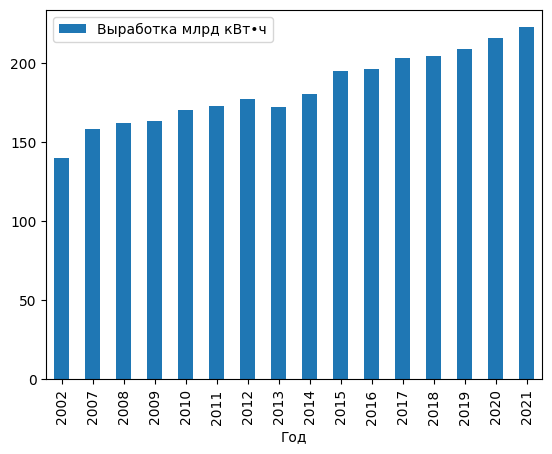

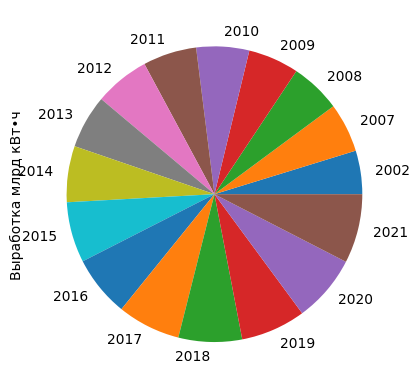

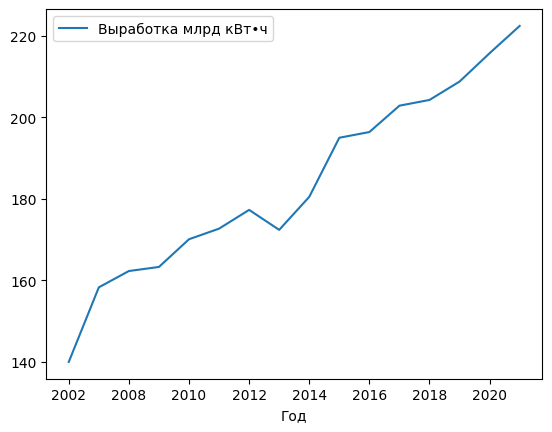

In [111]:
# изображения
tabl = tabl.sort_values(['Год'])
tabl.plot(x = 'Год', y = 'Выработка млрд кВт•ч', kind='bar',)
tabl.plot(x = 'Год', y = 'Выработка млрд кВт•ч', kind='pie', subplots=True, legend=False)
tabl.plot(x = 'Год', y = 'Выработка млрд кВт•ч', subplots=True)
plt.show()